<a href="https://colab.research.google.com/github/kikiru328/Study_Notebook/blob/main/Torch_b11one_Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MODULE IMPORT

In [3]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

from glob import glob
from tqdm import tqdm

from PIL import Image

### Data copy

In [ ]:
import os
import shutil
shutil.copytree('/content/drive/MyDrive/unetimgs','/content/bone')

'/content/bone'

In [ ]:
pwd

'/content'

In [ ]:
!git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git

Cloning into 'youtube-cnn-002-pytorch-unet'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 29), reused 52 (delta 16), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
%cd /content/youtube-cnn-002-pytorch-unet

/content/youtube-cnn-002-pytorch-unet


In [ ]:
! rm -rf '/content/youtube-cnn-002-pytorch-unet/datasets/train'

In [ ]:
TRAIN_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/train'
Val_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/val'
TEST_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/test'
SAVE_PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/save'

Mask_path = '/content/bone/datasets/masks/train'

# print(TRAIN_PATH)
masks = glob('/content/bone/datasets/masks/train/*.png')
masks = sorted(masks)


WIDTH = 800
HEIGHT = 800

rows = 4
cols = 4

for num, mask in enumerate(masks):
    # print(mask)
    image = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    # print(image)
    im_np = np.asarray(image)
    # print(im_np.shape)
    grey_image = cv2.resize(im_np,(WIDTH,HEIGHT)).astype('float64')
    print(grey_image.shape)
    grey_image = grey_image.reshape(WIDTH,HEIGHT)
    # print(grey_image.shape)
    im = Image.fromarray(grey_image)

    if not os.path.exists(SAVE_PATH):
        os.makedirs(SAVE_PATH)
    if not os.path.exists(Val_PATH):
        os.makedirs(Val_PATH)
    if not os.path.exists(TEST_PATH):
        os.makedirs(TEST_PATH)
    if not os.path.exists(TRAIN_PATH):
        os.makedirs(TRAIN_PATH)
        
    np.save(TRAIN_PATH+'/'+'label_%03d.npy' % num, im)

(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)


In [ ]:
label1 = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/train/label_001.npy')
label1.shape

(800, 800)

In [ ]:
img_path = '/content/bone/datasets/imgs/train'

bones = glob(img_path + '/*.jpg')
bones = sorted(bones)

WIDTH = 800
HEIGHT = 800

rows = 4
cols = 4

bones_box = np.zeros((len(bones),WIDTH,HEIGHT))
# print(bones_box)
for num, bone in enumerate(bones):

    image_pil = cv2.imread(bone, cv2.IMREAD_GRAYSCALE)
    # print(image_pil)
    image = np.array(image_pil)
    # print(image.shape)
    grey_image = cv2.resize(image,(WIDTH,HEIGHT)).astype('float64')
    # print(grey_image.shape)
    grey_image = grey_image.reshape(WIDTH,HEIGHT)
    print(grey_image.shape)
    bones_box[num] = grey_image
    # print(bones_box)
    im = Image.fromarray(grey_image)
    # print(im)
    # np.save(TRAIN_PATH+'/'+'input_%03d.npy' % num, im)

(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)
(800, 800)


In [ ]:
input1 = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/train/input_001.npy')
input1.shape

(800, 800)

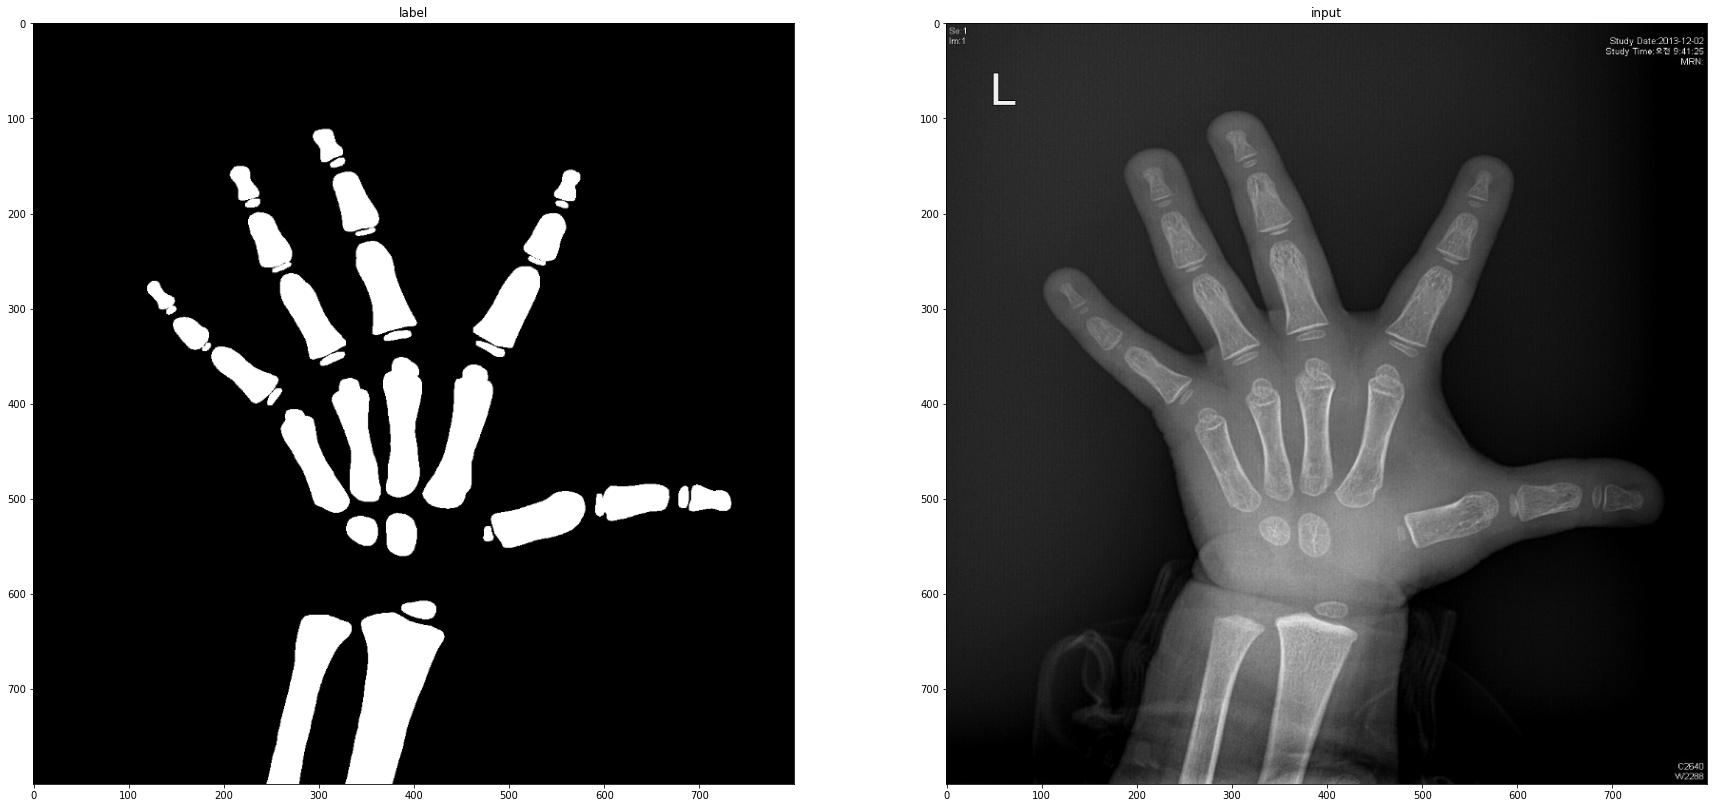

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(121)
plt.imshow(label1, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input1, cmap='gray')
plt.title('input')

plt.show()

(800, 800)

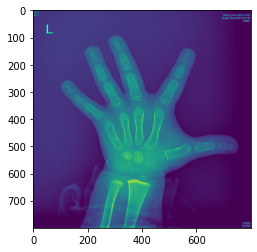

In [ ]:
plt.imshow(input1)
input1.shape

In [ ]:
pwd

'/content/youtube-cnn-002-pytorch-unet'

In [ ]:
%cd '/content/youtube-cnn-002-pytorch-unet'

/content/youtube-cnn-002-pytorch-unet


In [ ]:
!python train.py

learning rate: 1.0000e-03
batch size: 2
number of epoch: 100
data dir: ./datasets
ckpt dir: ./checkpoint
log dir: ./log
result dir: ./result
mode: train
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to 

In [ ]:
shutil.copy('/content/drive/MyDrive/2차 프로젝트 원본 데이터/데이터 원본/image/Female/153_F.jpg','/content/bone/datasets/imgs/test/153_F.png')
shutil.copy('/content/drive/MyDrive/2차 프로젝트 원본 데이터/데이터 원본/image/Female/322_F.jpg','/content/bone/datasets/imgs/test/322_F.png')

'/content/bone/datasets/imgs/test/322_F.png'

(1464, 1344)

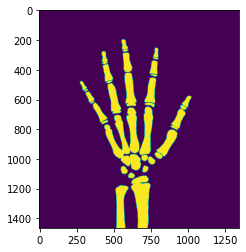

In [ ]:
# # a = cv2.imread(bones[0])
# # plt.imshow(a)
# # print(a.shape)
# image = Image.open('/content/bone/datasets/masks/test/153_F.png')
# image = np.array(image)
# print(image)
# plt.imshow(image)
# # image.max()
# image.shape

img = cv2.imread('/content/bone/datasets/masks/test/153_F.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img.shape

(1420, 1008)

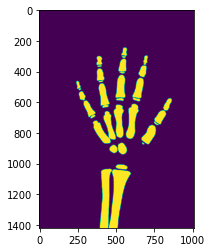

In [ ]:
a = cv2.imread('/content/bone/datasets/masks/train/14.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(a)
a.shape

/content/bone/datasets/masks/test/153_F.png size =  (800, 800)
/content/bone/datasets/masks/test/322_F.png size =  (800, 800)


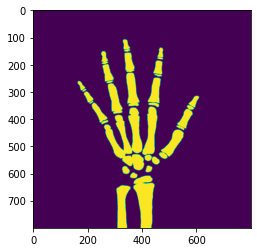

In [ ]:
PATH = '/content/bone/datasets/masks/test'
bones = glob(PATH+'/*.png')

# WIDTH = 800
# HEIGHT = 800

bones_box = np.zeros((len(bones),WIDTH,HEIGHT))

for num, bone in enumerate(bones):
    image_pil = cv2.imread(bone,cv2.IMREAD_GRAYSCALE)

#   image_pil = Image.open(bone)
#   image = np.array(image_pil)

    resized_image = cv2.resize(image_pil,(WIDTH,HEIGHT))

    # grey_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
#   grey_image = resized_image.reshape(WIDTH,HEIGHT)

    bones_box[num] = resized_image

    print(f"{bone} size = ", resized_image.shape)

# bones_box = np.expand_dims(bones_box, axis=3)
# print(bones_box.shape)
plt.imshow(bones_box[0])

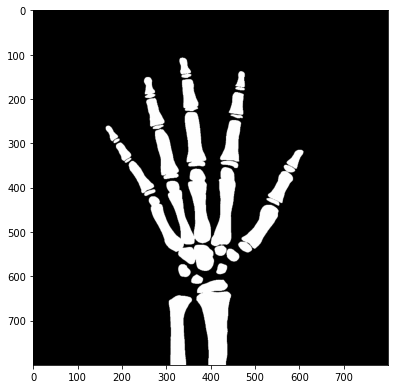

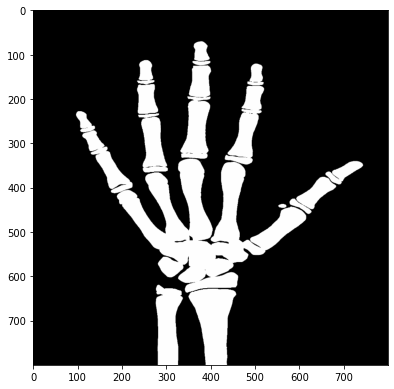

In [ ]:
rows = 4
cols = 4

for num, bone in enumerate(bones_box):
  # print(num)
  # print(bone[:,:,0].shape)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  plt.imshow(bone,cmap='gray')

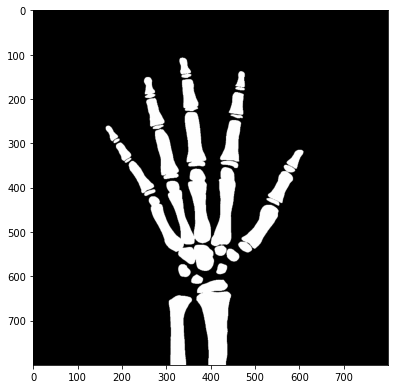

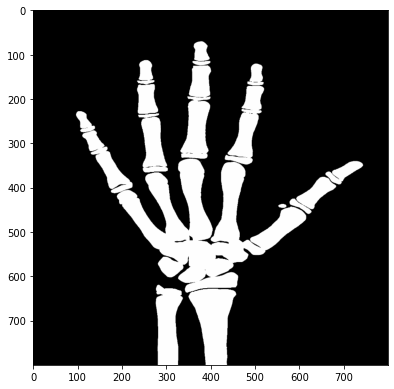

In [ ]:
# ground_truths = np.where(bones_box<255,'0.','255.').astype('float64')

rows = 4
cols = 4

# for num, ground_truth in enumerate(ground_truths):
for num, ground_truth in enumerate(bones_box):
  # print(num)
  num += 1
  plt.figure(figsize=(30,30))
  plt.subplot(rows, cols, num)
  image = ground_truth
  plt.imshow(image, cmap='gray')
  im = np.asarray(image)
  im = Image.fromarray(image)

  if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
  if not os.path.exists(Val_PATH):
    os.makedirs(Val_PATH)
  if not os.path.exists(TEST_PATH):
    os.makedirs(TEST_PATH)
  # plt.imsave(SAVE_PATH+'/'+f'{bones[num-1][:-4]}.jpeg', im)
  # np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)
  num -= 1

  np.save('/content/youtube-cnn-002-pytorch-unet/datasets/test'+'/'+'label_%03d.npy' % num, im)

In [ ]:
PATH = '/content/youtube-cnn-002-pytorch-unet/datasets/test'

bones = glob('/content/bone/datasets/imgs/test/*.png')


WIDTH = 800
HEIGHT = 800

rows = 4
cols = 4
print(bones)
bones_box = np.zeros((len(bones),WIDTH,HEIGHT))

for num, bone in enumerate(bones):
    image_pil = cv2.imread(bone,cv2.IMREAD_GRAYSCALE)
    # image_pil = Image.open(bone)
    # image = np.array(image_pil)

    grey_image = cv2.resize(image_pil,(WIDTH,HEIGHT)).astype('float64')

    # print(grey_image.shape)

    # grey_image = grey_image.reshape(WIDTH,HEIGHT)
    print(grey_image.shape)

    bones_box[num] = grey_image

    im = Image.fromarray(grey_image)

    if not os.path.exists(SAVE_PATH):
        os.makedirs(SAVE_PATH)
    np.save(PATH+'/'+'input_%03d.npy' % num, im)

['/content/bone/datasets/imgs/test/153_F.png', '/content/bone/datasets/imgs/test/322_F.png']
(800, 800)
(800, 800)


In [ ]:
%cd /content/youtube-cnn-002-pytorch-unet

/content/youtube-cnn-002-pytorch-unet


In [ ]:
!python eval.py

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
TEST: BATCH 0001 / 0001 | LOSS 0.0903
AVERAGE TEST: BATCH 0001 / 0001 | LOSS 0.0903


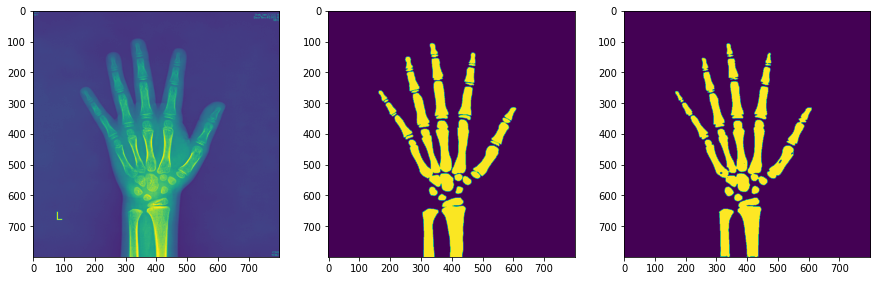

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(np.load('/content/youtube-cnn-002-pytorch-unet/results/numpy/input_0000.npy'))

plt.subplot(132)
plt.imshow(np.load('/content/youtube-cnn-002-pytorch-unet/results/numpy/label_0000.npy'))

plt.subplot(133)
plt.imshow(np.load('/content/youtube-cnn-002-pytorch-unet/results/numpy/output_0000.npy'))

In [ ]:
a = glob('/content/bone/datasets/masks/train/*.png')
len(a)

21

In [ ]:
shutil.copytree('/content/youtube-cnn-002-pytorch-unet','/content/drive/MyDrive/unet_practice/youtube')

'/content/drive/MyDrive/unet_practice/youtube'

In [6]:
import torch
model = torch.load('/content/drive/MyDrive/PROJECTS/unet_practice/youtube/checkpoint/model_epoch100.pth')

In [8]:
model('/content/drive/MyDrive/PROJECTS/2차 프로젝트 원본 데이터/데이터 원본/image/Male/001_M.jpg')

TypeError: ignored